In [1]:
import numpy as np
import pandas as pd

In [2]:
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

In [3]:
def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [4]:
def update_centroids(data, labels, k):
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

In [15]:
def kmeans_clustering(data, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        
        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    return centroids, labels

In [21]:
if __name__ == "__main__":
    k = 3  
    csv_path = "product_defect_data.csv"
    df = pd.read_csv(csv_path)
    defect_data = df[["Feature1", "Feature2"]].values
    centroids, labels = kmeans_clustering(defect_data, k)

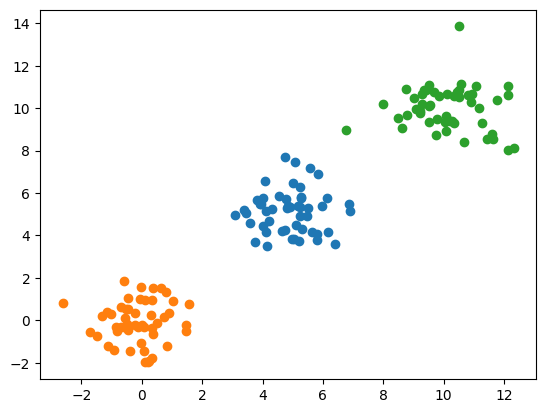

In [22]:
import matplotlib.pyplot as plt
for i in range(k):
    cluster_points = defect_data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")

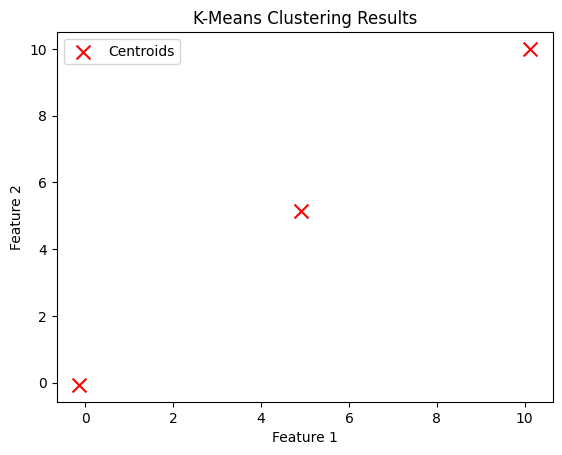

In [23]:
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()